# Implémentation d'un Réseau de Neurones Convolutif (CNN) en NumPy

## Introduction
Ce projet implémente un **réseau de neurones convolutif (CNN)** pour la classification du dataset **MNIST**, sans utiliser TensorFlow ou PyTorch.  
L'objectif est d'implémenter toutes les étapes du CNN **manuellement avec NumPy**, en comprenant en détail chaque opération.  
 

## Fonctionnalités  
### 1. Chargement et Prétraitement des Données  
### 2. Architecture du Modèle  
### 3. Entraînement du Modèle  
### 4. Prédictions et Évaluation  
### 5. Visualisation des Prédictions  

 ## Importation des bibliothèques

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Préparation des Données

In [7]:
data = pd.read_csv("C:\\Users\\PC\\Documents\\Convolutional Neural Network(CNN)\\mnist_train.csv")
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(59999, 785)

## Architecture du Modèle
### 1. **Entrée**  
- Une image **28x28 pixels** est aplatie en un vecteur de **784 valeurs** (1D).  
- Chaque pixel est normalisé entre **0 et 1**.  

### 2. **Couche Cachée (Layer 1)**  
- **784 neurones d'entrée → 10 neurones cachés**.  
- Poids **W1** : Matrice **(10, 784)** initialisée aléatoirement.  
- Biais **b1** : Vecteur **(10,1)** initialisé à 0.  
- Activation : **ReLU**.  

### 3. **Couche de Sortie (Layer 2)**  
- **10 neurones cachés → 10 neurones de sortie** (un pour chaque chiffre de 0 à 9).  
- Poids **W2** : Matrice **(10, 10)** initialisée aléatoirement.  
- Biais **b2** : Vecteur **(10,1)** initialisé à 0.  
- Activation : **Softmax** (probabilités de classification).  

### 4. **Optimisation**  
- Fonction de coût : **Cross-Entropy Loss**.  
- Mise à jour des paramètres avec la **descente de gradient**.  
- Calcul des gradients via **la rétropropagation**.  

### 5. **Prédictions & Évaluation**  
- La classe prédite est l’indice du neurone de sortie avec la plus grande activation.  
- Évaluation basée sur **l'exactitude (accuracy)**. 

## Séparation en jeu de développement et d'entraînement

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)  # Mélange des données avant la séparation

# Séparation en jeu de développement et d'entraînement
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_, m_train = X_train.shape


 ## Initialisation des Paramètres

In [20]:
def init_params():
    np.random.seed(42)  # Pour des résultats reproductibles
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2


## Fonctions d'Activation

In [21]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stabilisation numérique
    return expZ / np.sum(expZ, axis=0, keepdims=True)


## Forward Propagation

In [22]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


## Fonction One-Hot Encoding

In [23]:
def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


## Dérivée de ReLU

In [24]:
def ReLU_deriv(Z):
    return Z > 0


## Backward Propagation

In [25]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2


## Mise à Jour des Paramètres

In [26]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= alpha * dW2  
    b2 -= alpha * db2    
    return W1, b1, W2, b2


## Prédiction et Précision

In [27]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size


## Descente de Gradient (Entraînement du Modèle)

In [28]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy = {acc:.4f}")
    
    return W1, b1, W2, b2


## Entraînement du Modèle

In [37]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=1000)


Iteration 0: Accuracy = 0.1236
Iteration 10: Accuracy = 0.2087
Iteration 20: Accuracy = 0.2588
Iteration 30: Accuracy = 0.3021
Iteration 40: Accuracy = 0.3492
Iteration 50: Accuracy = 0.4382
Iteration 60: Accuracy = 0.4762
Iteration 70: Accuracy = 0.5068
Iteration 80: Accuracy = 0.5655
Iteration 90: Accuracy = 0.6139
Iteration 100: Accuracy = 0.6430
Iteration 110: Accuracy = 0.6693
Iteration 120: Accuracy = 0.6930
Iteration 130: Accuracy = 0.7109
Iteration 140: Accuracy = 0.7269
Iteration 150: Accuracy = 0.7413
Iteration 160: Accuracy = 0.7547
Iteration 170: Accuracy = 0.7667
Iteration 180: Accuracy = 0.7777
Iteration 190: Accuracy = 0.7879
Iteration 200: Accuracy = 0.7968
Iteration 210: Accuracy = 0.8060
Iteration 220: Accuracy = 0.8144
Iteration 230: Accuracy = 0.8225
Iteration 240: Accuracy = 0.8296
Iteration 250: Accuracy = 0.8361
Iteration 260: Accuracy = 0.8423
Iteration 270: Accuracy = 0.8480
Iteration 280: Accuracy = 0.8527
Iteration 290: Accuracy = 0.8560
Iteration 300: Accura

## Fonction de Prédiction sur une Image

In [38]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)


## Test de Prédiction sur une Image du Dataset

In [39]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index].reshape(28, 28)
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print("Prédiction:", prediction)
    print("Vraie étiquette:", label)
    
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prédiction: [4]
Vraie étiquette: 6


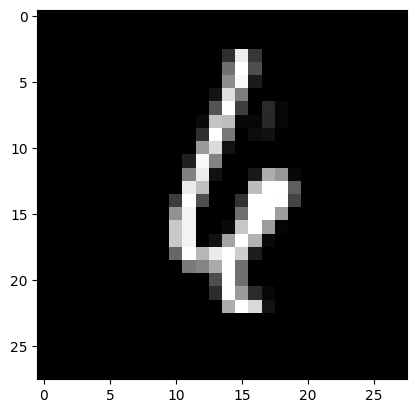

Prédiction: [3]
Vraie étiquette: 3


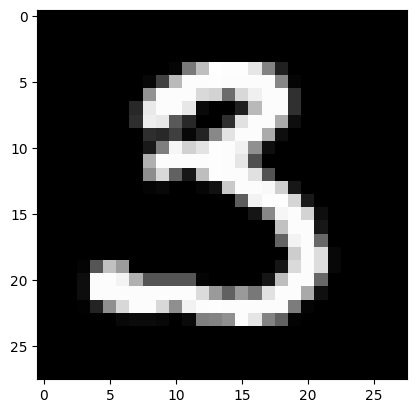

Prédiction: [2]
Vraie étiquette: 2


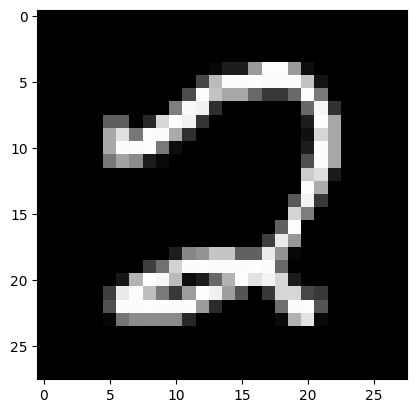

Prédiction: [6]
Vraie étiquette: 6


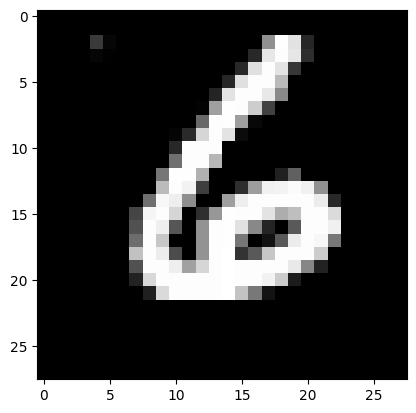

Prédiction: [5]
Vraie étiquette: 5


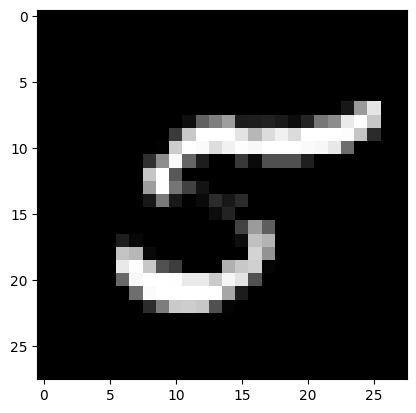

In [40]:
# Vérifier quelques prédictions
for i in range(5):  # Tester les 5 premières images
    test_prediction(i, W1, b1, W2, b2)

